In [32]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [33]:
# Construct a tf.data.Dataset
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [82]:
def show_img(index):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(f"Label: {class_names[train_labels[index]]}")
    plt.axis('off')
    plt.show() 

In [115]:
def plot_random(index):
    plt.figure(figsize=(7, 7))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(train_data[i], cmap=plt.cm.binary)
        plt.title(f"Label: {class_names[train_labels[i]]}")
        plt.axis('off')
    plt.show()

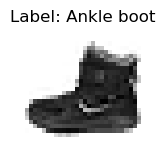

In [116]:
show_img(0)

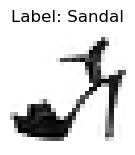

In [117]:
show_img(9)

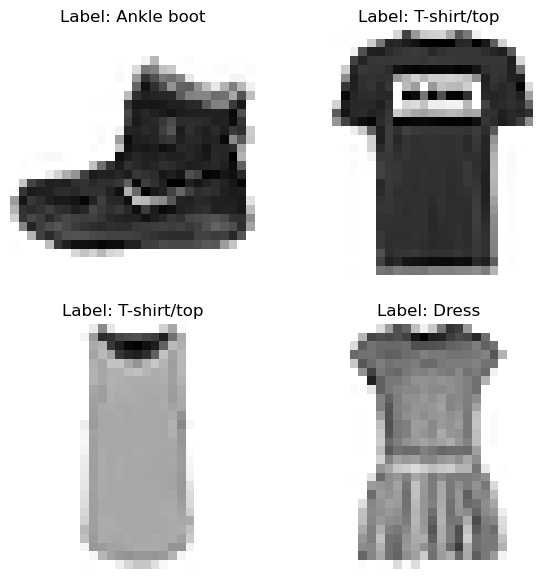

In [118]:
plot_random(1000)